In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense , Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD , Adam

In [3]:
!unzip '/content/archive (1).zip'

Archive:  /content/archive (1).zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [4]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(train['label'].min())
print(train['label'].max())

0
9


In [ ]:
x = train.drop('label' , axis = 1)
y = train['label']

In [ ]:
print(x.shape)
print(y.shape)

(60000, 784)
(60000,)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [ ]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Dense(256 , activation = 'relu' , input_shape = (784,))) # Layer 1 and Input Layer
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(256 , activation = 'relu')) # Layer 2
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(256 , activation = 'relu')) # Layer 3
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(10 , activation = 'softmax')) # Output Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
hist = model.fit(x_train , y_train_ohe , batch_size = 128 , epochs = 100 , validation_data = (x_test , y_test_ohe))

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5547 - loss: 10.5110 - val_accuracy: 0.7424 - val_loss: 0.7027
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7026 - loss: 0.8678 - val_accuracy: 0.7963 - val_loss: 0.5867
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7517 - loss: 0.7006 - val_accuracy: 0.8219 - val_loss: 0.5042
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7824 - loss: 0.6093 - val_accuracy: 0.8330 - val_loss: 0.4757
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7942 - loss: 0.5652 - val_accuracy: 0.8339 - val_loss: 0.4665
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7966 - loss: 0.5513 - val_accuracy: 0.8383 - val_loss: 0.4473
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8098 - loss: 0.5236 - val_accuracy: 0.8451 - val_loss: 0.4472
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8157 - loss: 0.5051 -

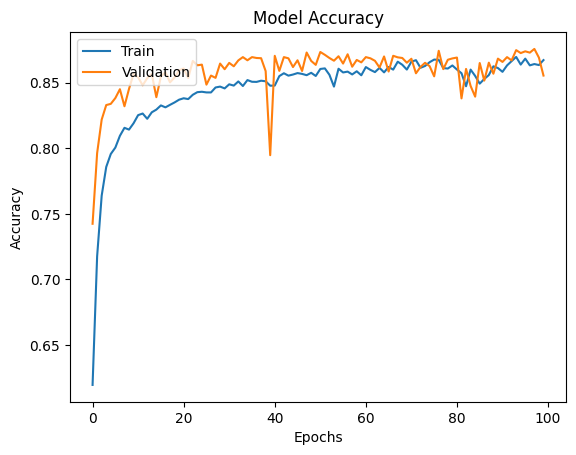

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

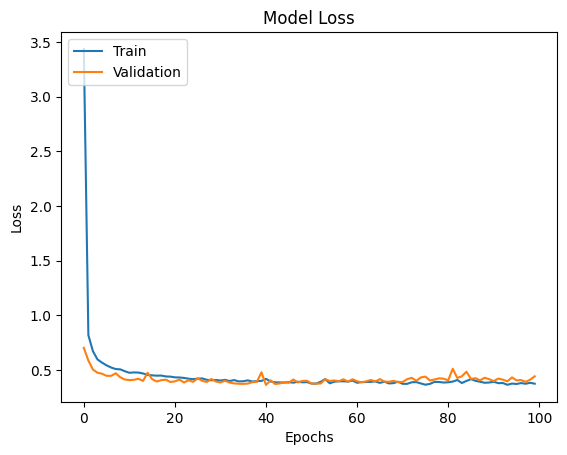

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

In [ ]:
y_hat_train_dense = np.argmax(model.predict(x_train) , axis = 1)
y_hat_test_dense = np.argmax(model.predict(x_test) , axis = 1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
model_eval(y_train , y_hat_train_dense)

The Accuracy of the Model is: 0.87
[[4283    4   14   97   16    0  391    0   11    0]
 [   5 4772    0   35    1    0    2    0    1    0]
 [  35    0 3658   33  813    0  249    0    2    0]
 [ 101   13    4 4340  195    0   95    0    7    0]
 [   7    8  257  130 4247    0  142    0    2    0]
 [   0    0    0    0    0 4802    0   10    1    0]
 [ 821    6  432   80 1689    0 1788    0   24    0]
 [   0    0    0    0    0    5    0 4750    0   39]
 [   2    1    1    7   10    1   67    6 4688    0]
 [   0    0    0    0    0    4    0  127    0 4669]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4816
           1       0.99      0.99      0.99      4816
           2       0.84      0.76      0.80      4790
           3       0.92      0.91      0.92      4755
           4       0.61      0.89      0.72      4793
           5       1.00      1.00      1.00      4813
           6       0.65      0.37      0.47      4840
 

In [ ]:
model_eval(y_test , y_hat_test_dense)

The Accuracy of the Model is: 0.86
[[1019    1    6   27    8    0  116    0    7    0]
 [   4 1160    0   16    2    0    1    0    1    0]
 [  13    3  910   10  207    0   62    0    5    0]
 [  41   14    1 1113   39    0   32    0    5    0]
 [   1    2   68   49 1037    0   47    1    2    0]
 [   0    0    0    0    0 1149    0   26    1   11]
 [ 210    2  100   26  394    0  419    0    9    0]
 [   0    0    0    0    0   13    0 1161    0   32]
 [   1    0    4    2    5    6   27    8 1164    0]
 [   0    0    0    0    0    8    0   58    0 1134]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1184
           1       0.98      0.98      0.98      1184
           2       0.84      0.75      0.79      1210
           3       0.90      0.89      0.89      1245
           4       0.61      0.86      0.72      1207
           5       0.98      0.97      0.97      1187
           6       0.60      0.36      0.45      1160
 